### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

## Desafio - construindo um segundo modelo
É recomendado utilizar mais de um modelo de classificação em projetos de machine learning, para que sejam comparados os resultados e escolhido aquele modelo que tem um melhor desempenho, após todas as análises e aprimoramentos.

Utilizamos durante a aula o algoritmo de árvore de decisão, mas a biblioteca Scikit-Learn possui diversos outros métodos de classificação que podem ser utilizados no nosso projeto. Como desafio, utilize o algoritmo Random Forest para criar um modelo e avaliar o desempenho com a acurácia e a matriz de confusão, e compare os resultados com o resultado da árvore de decisão.

*Como uma dica, vasculhe a documentação do algoritmo [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explore este material e perceba como importar a função. Durante esse processo, lembre-se de checar os parâmetros do método para evitar que o modelo se ajuste muito aos dados de treinamento.*

In [3]:
import pandas as pd
dados = pd.read_csv('emp_automovel.csv')
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, stratify = y_treino, random_state = 5)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9150987224157956
Acurácia de validação: 0.9128124727811167


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

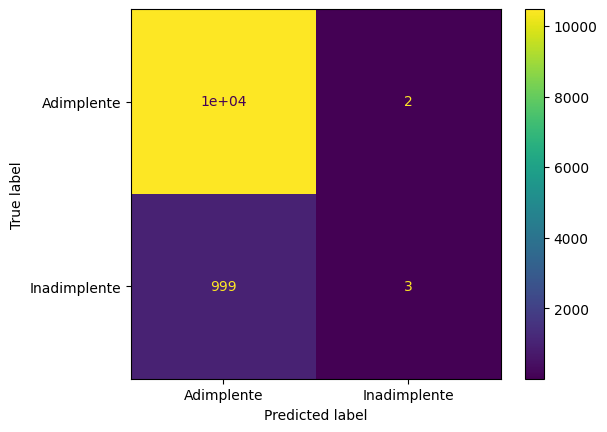

In [10]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

# Aula 1

### Desafio 1

Para a construção de um modelo de machine learning são necessários dados. Como tarefa inicial, faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y). A variável alvo é a coluna que quer classificar, contendo a informação se o paciente possui ou não a diabetes. As variáveis explicativas são todas as colunas com exceção da diabetes. A separação dos dados pode ser feita com a seleção de colunas com `pandas`.

In [11]:
import pandas as pd

dados = pd.read_csv('diabetes.csv')
dados

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [12]:
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

### Desafio 2

Uma etapa muito importante em projetos de classificação é a validação dos modelos, para identificar se está havendo a generalização do modelo para dados novos. Realize a divisão dos dados entre treino, validação e teste. Utilize 5% dos dados para teste e com o restante, deixe 25% para validação. No momento da separação, use o parâmetro `stratify` a partir da variável alvo para manter a proporção dos dados.

In [13]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

### Desafio 3

A etapa de modelagem de dados consiste em utilizar um algoritmo capaz de identificar padrões nos dados e classificar os valores. A partir do modelo é possível extrair uma taxa de acerto para entender o seu desempenho. Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [16]:
arvore.fit(x_treino, y_treino)
print(f'Acurácia de treino: {arvore.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {arvore.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


In [17]:
random_forest.fit(x_treino, y_treino)
print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {random_forest.score(x_val, y_val)}')

Acurácia de treino: 0.7321428571428571
Acurácia de teste: 0.6808510638297872


### Desafio 4

A taxa de acerto geralmente não fornece informações suficientes para entender o comportamento do modelo. A matriz de confusão é uma ferramenta mais completa, capaz de fornecer os acertos e erros do modelo para cada classe. Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho da previsão. Para construir a matriz, use o método `predict` para gerar as previsões dos valores e comparar com os valores reais da base de dados.

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

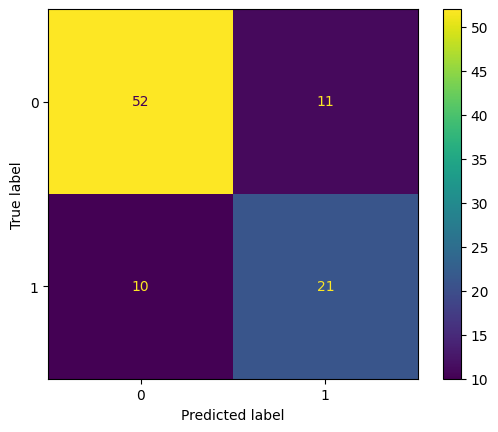

In [19]:
previsao_arvore = arvore.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore);

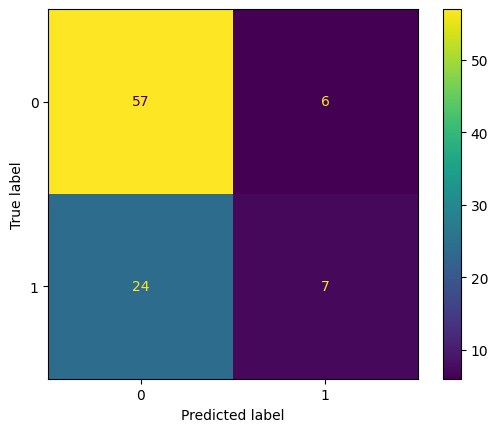

In [20]:
previsao_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_rf);

# Aula 2

### Desafio 1

Para uma avaliação completa de um modelo de classificação, podemos explorar métricas que avaliam a taxa de acerto geral e também para cada classe da variável alvo de forma individual. Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1. A biblioteca Scikit-Learn possui funções para calcular cada uma das métricas, bastando fazer a importação e utilizar como parâmetros os valores reais e previstos pelo modelo.

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [22]:
previsao_arvore = arvore.predict(x_val)

print(f'Acurácia (Decision Tree): {accuracy_score(y_val, previsao_arvore)}')
print(f'Recall (Decision Tree): {recall_score(y_val, previsao_arvore)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, previsao_arvore)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, previsao_arvore)}')

Acurácia (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisão (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [23]:
previsao_rf = random_forest.predict(x_val)

print(f'Acurácia (Random Forest): {accuracy_score(y_val, previsao_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, previsao_rf)}')
print(f'Precisão (Random Forest): {precision_score(y_val, previsao_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, previsao_rf)}')

Acurácia (Random Forest): 0.6808510638297872
Recall (Random Forest): 0.22580645161290322
Precisão (Random Forest): 0.5384615384615384
F1_Score (Random Forest): 0.3181818181818182


### Desafio 2
Além de métricas numéricas, gráficos podem ser explorados para avaliar o desempenho de um modelo e compreender se ele consegue diferenciar bem uma classe da outra. Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico. A curva ROC pode ser gerada usando o método [`RocCurveDisplay.from_predictions`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [24]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

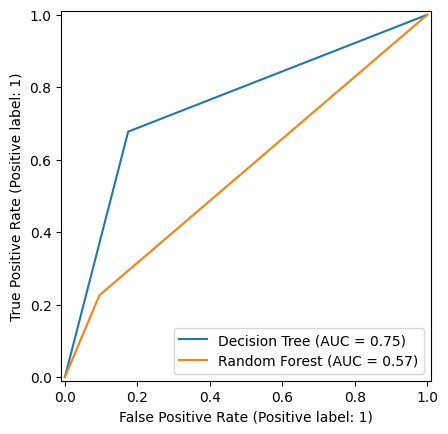

In [25]:
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [26]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, previsao_arvore)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, previsao_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.565284178187404


### Desafio 3

Além da curva ROC, a curva de precisão x recall pode ser usada para avaliar o desempenho de modelos, sendo mais interessante para dados desbalanceados. Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico. A curva precisão x recall pode ser gerada usando o método [`PrecisionRecallDisplay.from_predictions`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions).

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [27]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

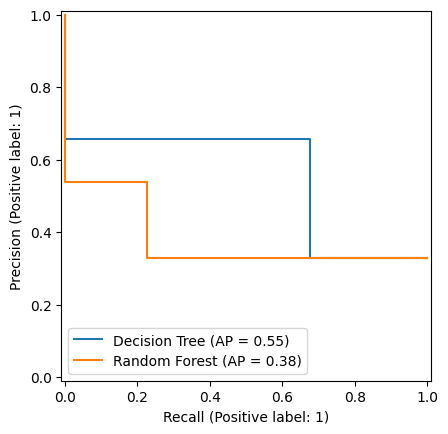

In [28]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_precision_recall.ax_) 

In [29]:
print(f'AP (Decision Tree): {average_precision_score(y_val, previsao_arvore)}')
print(f'AP (Random Forest): {average_precision_score(y_val, previsao_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.376907238266195


### Desafio 4

Um resumo das principais métricas de classificação pode ser muito útil para sumarizar as informações e gerar insights de forma rápida. Gere os relatórios de métricas dos modelos de classificação construídos no desafio da aula 1. O relatório de métricas pode ser gerado a partir da função [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) da biblioteca Scikit-Learn.

In [30]:
from sklearn.metrics import classification_report

In [31]:
print('Decision Tree')
print(classification_report(y_val, previsao_arvore))
print('Random Forest')
print(classification_report(y_val, previsao_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        63
           1       0.54      0.23      0.32        31

    accuracy                           0.68        94
   macro avg       0.62      0.57      0.55        94
weighted avg       0.65      0.68      0.64        94



## Desafio 2 - validação com outras métricas
É sempre importante analisar o problema de negócio antes de avaliar um modelo de classificação, para que seja escolhida a métrica mais adequada. No nosso projeto, estamos classificando clientes inadimplentes de uma locadora de veículos e identificamos que a métrica mais relevante é o *recall*, que busca minimizar a quantidade de pessoas inadimplentes que são classificadas como adimplentes.

Para obter um resultado completo das métricas na validação cruzada assim como o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), é preciso utilizar o método `cross_validate` e informar no parâmetro `scoring` as métricas a serem avaliadas.

Como desafio, construa um código para gerar o intervalo de confiança para cada uma das métricas com a utilização da validação cruzada:
- Acurácia
- Recall
- Precisão
- F1-score

*Uma dica é explorar a documentação do método `cross_validate` a partir deste [material de apoio](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), onde você pode descobrir uma forma mais simples de retornar as métricas de uma só vez com uma lista de strings.*

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

In [ ]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [ ]:
relatorio_metricas(cv_resultados)

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.